In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("playstore-analysis (2).csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<br>

## 1. Data clean up – Missing value treatment

### a. Drop records where rating is missing since rating is our target/study variable

In [3]:
df.dropna(subset=['Rating'], axis=0, inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.00000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.00000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.00000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.00000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.00000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.00000,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.00000,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.00000,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.00000,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.00000,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


<br>

### b.	Check the null values for the Android Ver column. 

In [4]:
nullandroid = df['Android Ver'].isnull()
df[nullandroid]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.00000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.00000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.52952,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### i.	Are all 3 records having the same problem?

All 3 records have null value in Android Ver but the 3rd record has many more problems. The values in columns Category, Rating, Installs, Type, Price, Genres are all unfit for those columns and the value in Content Rating is null.

#### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [5]:
df.drop(10472, inplace=True)

#### iii. Replace remaining missing values with the mode

In [6]:
mode = df['Android Ver'].mode()
df['Android Ver'].fillna(mode[0], inplace=True)

<br>

### c. Current ver – replace with most common value

In [7]:
mode2 = df['Current Ver'].mode()
df['Current Ver'].fillna(mode2[0], inplace=True)

<br>

## 2. Data clean up – correcting the data types

### a. Which all variables need to be brought to numeric types?

In [8]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

The variables Reviews and Installs need to be converted to an int type whereas Price needs to be converted to a float type.

### b. Price variable – remove $ sign and convert to float

In [9]:
df['Price'] = df['Price'].str.replace('$','').astype(float)

### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [10]:
df['Installs'] = (df['Installs'].str.replace(',', '')).str.replace('+', '').astype(int)

### d. Convert all other identified columns to numeric

In [11]:
df['Reviews'] = df['Reviews'].astype(int);

<br>

## 3. Sanity checks – check for the following and handle accordingly

### a.	Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
#### i. Are there any such records? Drop if so.


In [12]:
df.drop(df[(df.Rating < 1) | (df.Rating > 5)].index, inplace=True)

### b. Reviews should not be more than installs as only those who installed can review the app.
#### i. Are there any such records? Drop if so.


In [13]:
df.drop(df[(df.Installs < df.Reviews)].index, inplace= True)

<br>

## 4. Identify and handle outliers –

### a. Price column

#### i. Make suitable plot to identify outliers in price

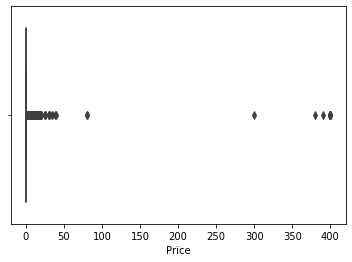

In [14]:
sns.boxplot(x = df['Price']);

#### ii. Do you expect apps on the play store to cost $200? Check out these cases

It would be very unusual for apps on the play store to cost that much.

In [15]:
df[(df.Price >= 200)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


#### iii. After dropping the useless records, make the suitable plot again to identify outliers

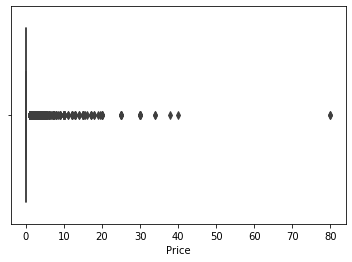

In [16]:
df.drop(df[df.Price >= 200].index, inplace=True)
sns.boxplot(x = df['Price']);

#### iv. Limit data to records with price < $30

In [17]:
df.drop(df[df.Price >= 30].index, inplace=True)

<br>

### b. Reviews column

#### i. Make suitable plot

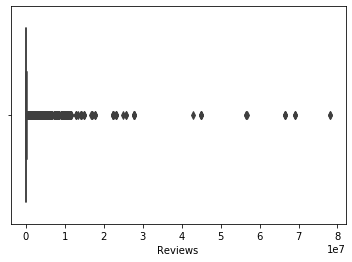

In [18]:
sns.boxplot(x = df['Reviews']);

#### ii. Limit data to apps with < 1 Million reviews

In [19]:
df.drop(df[df.Reviews >= 1000000].index, inplace=True)

<br>

### c. Installs

#### i. What is the 95th percentile of the installs?

In [20]:
mypercentile95 = df['Installs'].quantile(0.95)
mypercentile95

10000000.0

#### ii. Drop records having a value more than the 95th percentile

In [21]:
df.drop(df[df['Installs'] > mypercentile95].index, inplace=True)

<br>

# Data analysis to answer business questions

## 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

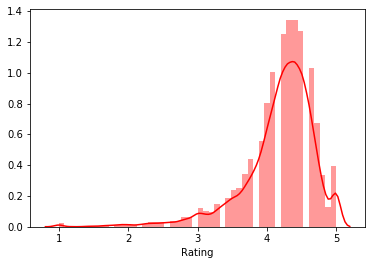

In [22]:
sns.distplot(df['Rating'], color='r');

The distribution of ratings is skewed left with a long left tail. It is more skewed towards lower values.

### a. How do you explain this?

The skew explains that the majority of apps on the play store in the data set are well rated, 4 and above. There are even some apps rated 5

### b. What is the implication of this on your analysis?

The implication of this is that there are too many outliers that fall more than 3 standard deviations away from the mean. This means that the data is junky. Also, the higher rated apps such as apps that have a rating of 5 stars only exist because the number of reviews is very less.

<br>

## 6. What are the top Content Rating values?

In [23]:
df['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

### a. Are there any values with very few records?

Yes, values with very few records are 'Unrated' and 'Adults only 18+'

### b. If yes, drop those as they won’t help in the analysis

In [24]:
df.drop(df[(df['Content Rating'] == 'Unrated') | (df['Content Rating'] == 'Adults only 18+')].index, inplace=True)

<br>

## 7. Effect of size on rating

### a. Make a jointplot to understand the effect of size on rating

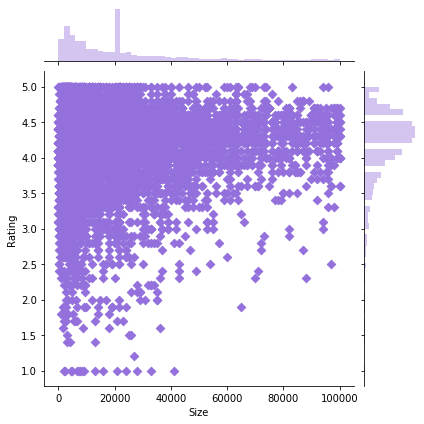

In [25]:
sns.jointplot(x='Size', y='Rating', data=df, marker='D', color='mediumpurple');

### b. Do you see any patterns?

Yes, there is a clear pattern that shows that as the app size increases, the rating seems to improve as well.

### c. How do you explain the pattern?

Smaller size attracts more installs and so, majority of the apps that are launched have a smaller size. That also means that the apps that are poor in quality tend to lie more in smaller size as it takes less efforts and attracts more downloads. That explains why as the size is increasing, the rating is also increasing.

## 8. Effect of price on rating

### a. Make a jointplot (with regression line)

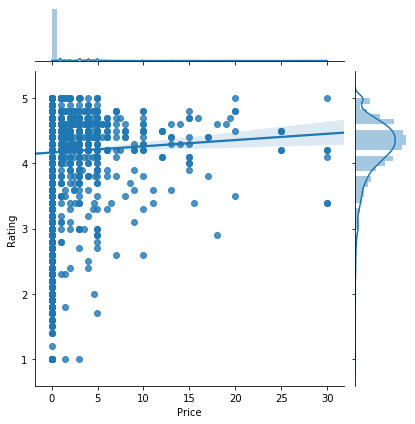

In [26]:
sns.jointplot(x='Price', y='Rating', data=df, kind= 'reg');

### b. What pattern do you see?

The pattern that can be seen is that with increase in price, the rating also tends to slightly increase. It's a positive correlation but a weak one.

### c. How do you explain the pattern?

The pattern can be explained because majority number of apps are free and hence, there are bound to be lower ratings if the quantity of apps is so vast.

### d. Replot the data, this time with only records with price > 0 

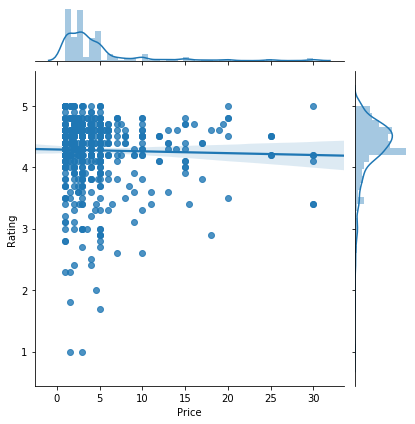

In [27]:
newdf = df[df['Price'] > 0]
sns.jointplot(x='Price', y='Rating', data=newdf, kind='reg');

### e. Does the pattern change?

Yes, the pattern does change. Now, the correlation is negligible.

### f. What is your overall inference on the effect of price on the rating?

The overall inference is that the price of an app has no effect on its rating. They are not correlated.

<br>

## 9. Look at all the numeric interactions together – 

### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

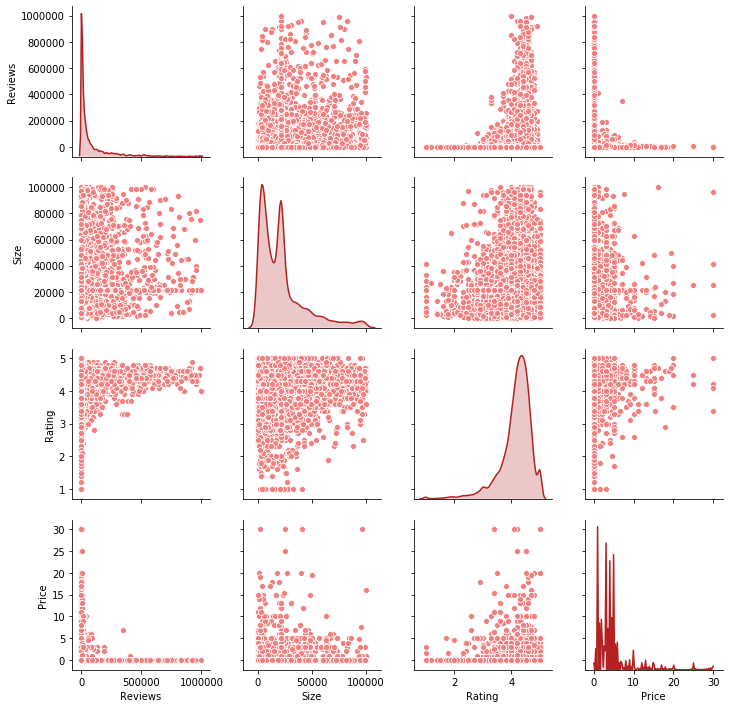

In [28]:
sns.pairplot(df[['Reviews','Size','Rating','Price']], diag_kind='kde', plot_kws={'color':'lightcoral'}, diag_kws={'color':'firebrick'});

<br>

## 10. Rating vs. content rating

### a. Make a bar plot displaying the rating for each content rating

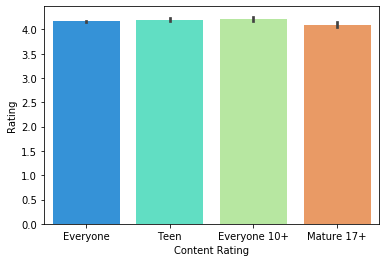

In [29]:
sns.barplot(x='Content Rating', y='Rating', data=df.reset_index(), palette='rainbow');

### b. Which metric would you use? Mean? Median? Some other quantile?

The metric I would use is Median because as seen from the Probability Density Function graph above, there are still a lot of outliers in the data. Hence, median is more preferable than mean.

### c. Choose the right metric and plot

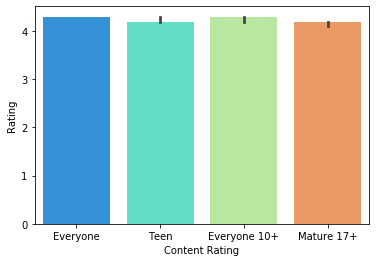

In [30]:
sns.barplot(x='Content Rating', y='Rating', data=df, estimator=np.median, palette='rainbow');

<br>

## 11. Content rating vs. size vs. rating – 3 variables at a time

### a. Create 5 buckets (20% records in each) based on Size

In [31]:
newdf = df
newdf = newdf.reset_index()
labels = ['lowest','low','medium','high','highest']
newdf['Bins'] = pd.qcut(newdf['Size'].rank(method='first'), q=5, labels=labels)
newdf['Bins'].value_counts()

lowest     1687
highest    1686
high       1686
medium     1686
low        1686
Name: Bins, dtype: int64

### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [70]:
pd.options.mode.chained_assignment = None

bucketdf = []
percentiles = []
count = 0
for i in labels:
    bucketdf.append(newdf[newdf['Bins'] == i])
    percentiles.append(bucketdf[count]['Rating'].quantile(.2))
    print(percentiles[count])
    bucketdf[count]['PercentileRating'] = percentiles[count]
    count += 1
    
bucketsdf = bucketdf[0].append(bucketdf[1]).append(bucketdf[2]).append(bucketdf[3]).append(bucketdf[4])

3.8
3.8
3.9
3.9
3.9


### c. Make a heatmap of this

#### i. Annotated

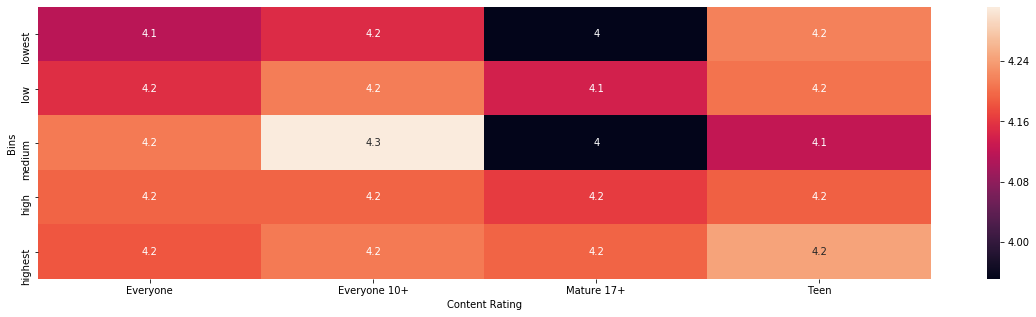

In [90]:
plt.figure(figsize=(20,5))
heatmap = bucketsdf.pivot_table(values='Rating',index='Bins', columns='Content Rating')
sns.heatmap(heatmap, annot=True);


#### ii. Greens color map

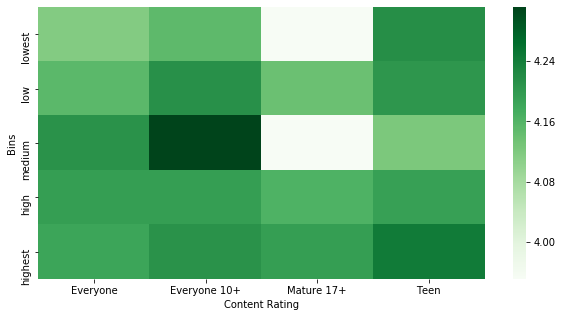

In [79]:
plt.figure(figsize=(10,5))
sns.heatmap(heatmap, cmap='Greens');

### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

From the heatmap, it can be inferred that the apps in any content rating that have a big size are well rated and loved by people.
Lighter apps are not preferred in all categories, the least preferred in Mature17+. Heavier apps on the other hand seem to be preferred by people from all categories.
Interestingly, medium-sized apps are the most preferred in the Everyone10+ category and lighter and medium-sized apps are the least preferred in the Mature17+ categories.